In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier


%matplotlib inline

# **HYPERPARAMETER TUNING FOR KNN**

In [5]:
df = pd.read_csv("/content/gdrive/My Drive/Synapse_LP/synapse_w2/synapse_w2/classified_data.txt", index_col=[0])

In [6]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [8]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [9]:
df.shape

(1000, 11)

In [10]:
df.isnull().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [11]:
Y=df["TARGET CLASS"]
Y

0      1
1      0
2      0
3      1
4      1
      ..
995    1
996    0
997    1
998    1
999    1
Name: TARGET CLASS, Length: 1000, dtype: int64

In [12]:
df.drop('TARGET CLASS', inplace=True, axis=1)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167


In [13]:
scaler = StandardScaler()

In [14]:
a = scaler.fit(df)
b = a.transform(df)
X = pd.DataFrame(b)
X.columns = ['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ']
X

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42) #random_state=101

In [81]:
def populate_dict(n, w, lp, lsl, a1, a2):
  d = {}
  d["n_neighbors"] = n
  d["weights"] = w
  d["p"] = lp
  d["leaf_size"] = lsl
  d["test_accuracy"] = a1
  d["train_accuracy"] = a2
  diff = a2-a1
  d["difference"] = diff
  return d
result0=[]

In [82]:
n_neighbors_list = range(1,20)
weights_list = ['uniform', 'distance']
p_list = [1,2,3]
leaf_size_list = [1,15,30,45,60]

for n in n_neighbors_list:
  for w in range(len(weights_list)):
    for lp in p_list:
      for lsl in leaf_size_list:
        classifier = KNeighborsClassifier(n_neighbors=n, weights=weights_list[w], p=lp, leaf_size=lsl)
        fitted_model = classifier.fit(X_train, Y_train)
        train_pred = fitted_model.predict(X_train)
        train_acc = np.sum(train_pred==Y_train)/len(train_pred)
        # gff = classification_report(Y_train, train_pred, output_dict=True)
        # train_acc = (float)(gff['accuracy'])
        test_pred = fitted_model.predict(X_test)
        test_acc = np.sum(test_pred==Y_test)/len(test_pred)
        # gf = classification_report(Y_test,test_pred, output_dict=True)
        # test_acc = (float)(gf['accuracy'])
        di = populate_dict(n, weights_list[w], lp,lsl, test_acc, train_acc)
        result0.append(di)

In [83]:
sorted(result0, key=lambda d : d["test_accuracy"], reverse=False)

[{'difference': 0.049523809523809526,
  'leaf_size': 1,
  'n_neighbors': 2,
  'p': 1,
  'test_accuracy': 0.9033333333333333,
  'train_accuracy': 0.9528571428571428,
  'weights': 'uniform'},
 {'difference': 0.049523809523809526,
  'leaf_size': 15,
  'n_neighbors': 2,
  'p': 1,
  'test_accuracy': 0.9033333333333333,
  'train_accuracy': 0.9528571428571428,
  'weights': 'uniform'},
 {'difference': 0.049523809523809526,
  'leaf_size': 30,
  'n_neighbors': 2,
  'p': 1,
  'test_accuracy': 0.9033333333333333,
  'train_accuracy': 0.9528571428571428,
  'weights': 'uniform'},
 {'difference': 0.049523809523809526,
  'leaf_size': 45,
  'n_neighbors': 2,
  'p': 1,
  'test_accuracy': 0.9033333333333333,
  'train_accuracy': 0.9528571428571428,
  'weights': 'uniform'},
 {'difference': 0.049523809523809526,
  'leaf_size': 60,
  'n_neighbors': 2,
  'p': 1,
  'test_accuracy': 0.9033333333333333,
  'train_accuracy': 0.9528571428571428,
  'weights': 'uniform'},
 {'difference': 0.04190476190476189,
  'leaf_s

In [ ]:
# Best accuracy and minimu difference at K=17

#  {'difference': -0.014761904761904754,
#   'leaf_size': 30,
#   'n_neighbors': 17,
#   'p': 2,
#   'test_accuracy': 0.9533333333333334,
#   'train_accuracy': 0.9385714285714286,
#   'weights': 'uniform'}

# **HYPERPARAMETER TUNING FOR DECISION TREE**

In [20]:
titanic_data_df2 = pd.read_csv("/content/gdrive/My Drive/Synapse_LP/synapse_w2/synapse_w2/titanic_data.csv")
titanic_data_df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
def normalize(data_list):
  X_new = []
  X_max = max(data_list)
  X_min = min(data_list)
  for i in data_list:
    X_new.append( (i - X_min)/(X_max - X_min) )
  return X_new

def titanic_preprocessing_pipeline(df):
  #enter preprocessing steps as done in task 1
  #make sure the preprocessed dataframe looks like the output in task 1
  #return the dataframe
  title_list = []
  for i in df["Name"]:
    title_search = re.search('(\w+)\.', i)
    if title_search:
      title = title_search.group(1)
      title_list.append(title)
  df["Title"] = title_list
  df = df.drop(["PassengerId", "Ticket", "Name"], axis=1, inplace=False)
  df = df.drop(["Cabin"], axis=1, inplace=False)
  df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=False) 
  df["Age"] = df["Age"].fillna(df["Age"].mean(), inplace=False)
  df["Family_members"] = df["SibSp"] + df["Parch"]
  df = df.drop(["SibSp", "Parch"], axis=1, inplace=False)
  df["Age"] = normalize(df["Age"])
  df["Fare"] = normalize(df["Fare"])
  df["Family_members"] = normalize(df["Family_members"])
  df = pd.get_dummies(df, columns=["Pclass", "Sex", "Title", "Embarked"])
  return df

done2_df = titanic_preprocessing_pipeline(titanic_data_df2)
done2_df

,Survived,Age,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Title_Capt,Title_Col,Title_Countess,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Embarked_C,Embarked_Q,Embarked_S
0,0,0.271174,0.014151,0.1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,0.472229,0.139136,0.1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1,0.321438,0.015469,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1,0.434531,0.103644,0.1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0,0.434531,0.015713,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.334004,0.025374,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
887,1,0.233476,0.058556,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
888,0,0.367921,0.045771,0.3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
889,1,0.321438,0.058556,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [22]:
ns = done2_df['Survived'] 
ns

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [23]:
done2_df.drop(["Survived"], axis=1, inplace=True)
from sklearn.model_selection import train_test_split
c_train, c_test, v_train, v_test = train_test_split(done2_df, ns, test_size=0.3, random_state=42)
import re

def populate_dict(c, i, j, k, mf, a1, a2, n):
  d = {}
  d["n_estimators"] = n
  d["criterion"] = c
  d["max_depth"] = i 
  d["min_samples_split"] = j
  d["min_samples_leaf"] = k
  d["max_features"] = mf
  d["test_acc"] = a1
  d["train_acc"] = a2
  diff = a2-a1
  d["diff"] = diff
  return d

In [24]:
cr_list=['entropy', 'gini']
msl_list=[5,10,15,30]
mss_list=[5,10,15,30]
maxd_list=[3,5,10,15,20]
mf_list=["auto", "sqrt", "log2",None]
n_estimators_list = [50, 100, 150, 200]
result=[]

for ne in n_estimators_list:
  for mf in range(len(mf_list)):
    for msl in msl_list:
      for mss in mss_list:
        for cr in range(len(cr_list)):
          for i in maxd_list:
            decision_tree = RandomForestClassifier(max_features=mf_list[mf],min_samples_leaf=msl,min_samples_split=mss, criterion=cr_list[cr], max_depth=i, n_estimators=ne)
            decisiontree = decision_tree.fit(c_train,v_train)
            train_pred = decisiontree.predict(c_train)
            gff = classification_report(v_train, train_pred, output_dict=True)
            train_ac = (float)(gff['accuracy'])
            myy_pred = decisiontree.predict(c_test)
            gf = classification_report(v_test,myy_pred, output_dict=True)
            ac = (float)(gf['accuracy'])
            dic = populate_dict(cr_list[cr], i, mss, msl, mf_list[mf], ac, train_ac, ne)
            result.append(dic)

In [25]:
sorted(result, key=lambda d : d["diff"], reverse=False)

[{'criterion': 'gini',
  'diff': -0.025831915862101984,
  'max_depth': 5,
  'max_features': 'log2',
  'min_samples_leaf': 30,
  'min_samples_split': 30,
  'n_estimators': 50,
  'test_acc': 0.8171641791044776,
  'train_acc': 0.7913322632423756},
 {'criterion': 'gini',
  'diff': -0.022663568194341344,
  'max_depth': 5,
  'max_features': 'auto',
  'min_samples_leaf': 30,
  'min_samples_split': 15,
  'n_estimators': 100,
  'test_acc': 0.8059701492537313,
  'train_acc': 0.78330658105939},
 {'criterion': 'gini',
  'diff': -0.021537576962698535,
  'max_depth': 3,
  'max_features': 'log2',
  'min_samples_leaf': 15,
  'min_samples_split': 10,
  'n_estimators': 50,
  'test_acc': 0.8208955223880597,
  'train_acc': 0.7993579454253612},
 {'criterion': 'entropy',
  'diff': -0.021537576962698535,
  'max_depth': 15,
  'max_features': 'log2',
  'min_samples_leaf': 30,
  'min_samples_split': 5,
  'n_estimators': 50,
  'test_acc': 0.8208955223880597,
  'train_acc': 0.7993579454253612},
 {'criterion': 'gi

In [26]:
print( 'Random Forest')
print({'criterion': 'gini',
  'diff': 0.021843032030856913,
  'max_depth': 20,
  'max_features': 'sqrt',
  'min_samples_leaf': 5,
  'min_samples_split': 30,
  'n_estimators': 50,
  'test_acc': 0.832089552238806,
  'train_acc': 0.8539325842696629})

Random Forest
{'criterion': 'gini', 'diff': 0.021843032030856913, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 30, 'n_estimators': 50, 'test_acc': 0.832089552238806, 'train_acc': 0.8539325842696629}


# **K-Fold Cross Validation on Linear Regression**

---



In [27]:
housing_data_df = pd.read_csv("/content/gdrive/My Drive/Synapse_LP/synapse_w2/synapse_w2/housing_data.csv")
housing_data_df.drop(['Address'], axis=1, inplace=True)
housing_data_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [28]:
y = housing_data_df['Price']
print(y.shape)
y

(5000,)


0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [29]:
housing_data_df.drop(['Price'], axis =1, inplace=True)
x = housing_data_df
print(x.shape)
x

(5000, 5)


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print("Training feature set size:",x_train.shape)
print("Test feature set size:",x_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (3500, 5)
Test feature set size: (1500, 5)
Training variable set size: (3500,)
Test variable set size: (1500,)


using cross val score

In [126]:
ls = [2,3,4,5,8,10]
for i in ls:
  lm = LinearRegression()
  cross_val_scores=cross_val_score(lm, x,y , cv=i)
  print(i)
  print(cross_val_scores)
  print("mean:", np.mean(cross_val_scores))

2
[0.91778924 0.91743669]
mean: 0.9176129651389249
3
[0.9186286  0.91734626 0.91717112]
mean: 0.9177153278872913
4
[0.91825861 0.91713779 0.91985019 0.91476853]
mean: 0.9175037804759409
5
[0.91758995 0.92030155 0.91524299 0.92085038 0.91381118]
mean: 0.9175592097606836
8
[0.91559356 0.92081282 0.92086647 0.91256201 0.91545783 0.92423063
 0.91610747 0.91348244]
mean: 0.9173891538543888
10
[0.91336093 0.92112399 0.91727189 0.92360986 0.91247623 0.91771186
 0.91672276 0.92487908 0.9212436  0.90539243]
mean: 0.917379262153734


using K-Fold

In [127]:
def dictionary(n, a1, a2):
  d = {}
  d["n_splits"] = n
  d["test_accuracy"] = a1
  d["train_accuracy"] = a2
  diff = a2-a1
  d["difference"] = diff
  return d
result3=[]

In [128]:
lst = [2,3,4,5,8,10]
for i in lst:
  kf = KFold(n_splits=i, shuffle=True)
  model = LinearRegression()
  test_acc=[]
  train_acc=[]
  for train_index, test_index in kf.split(x):
      x_train, x_test = x.iloc[train_index], x.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]
      model.fit(x_train, y_train)
      test_acc.append(model.score(x_test ,y_test))
      train_acc.append(model.score( x_train, y_train))
  test_mean = (float) ( np.sum(test_acc)/len(test_acc) )
  train_mean = (float) ( np.sum(train_acc)/len(train_acc) )
  ans = dictionary(i, test_mean, train_mean)
  result3.append(ans)

In [129]:
sorted(result3, key=lambda d : d["n_splits"], reverse=False)

[{'difference': 0.0005493804630570809,
  'n_splits': 2,
  'test_accuracy': 0.9175940185954115,
  'train_accuracy': 0.9181433990584685},
 {'difference': 0.0003697923693817273,
  'n_splits': 3,
  'test_accuracy': 0.9176867935708755,
  'train_accuracy': 0.9180565859402572},
 {'difference': 0.0003317093521251202,
  'n_splits': 4,
  'test_accuracy': 0.9177079724556785,
  'train_accuracy': 0.9180396818078036},
 {'difference': 0.00043592415543547425,
  'n_splits': 5,
  'test_accuracy': 0.917605810144903,
  'train_accuracy': 0.9180417343003384},
 {'difference': 0.0004925801391832962,
  'n_splits': 8,
  'test_accuracy': 0.9175448128441865,
  'train_accuracy': 0.9180373929833698},
 {'difference': 0.0007354071416884045,
  'n_splits': 10,
  'test_accuracy': 0.9172903391108447,
  'train_accuracy': 0.9180257462525331}]

# **K Fold Cross Validation on KNN**

In [35]:
knn_df = pd.read_csv("/content/gdrive/My Drive/Synapse_LP/synapse_w2/synapse_w2/classified_data.txt", index_col=[0])

In [36]:
A=knn_df["TARGET CLASS"]
A

0      1
1      0
2      0
3      1
4      1
      ..
995    1
996    0
997    1
998    1
999    1
Name: TARGET CLASS, Length: 1000, dtype: int64

In [37]:
knn_df.drop('TARGET CLASS', inplace=True, axis=1)
knn_df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167


In [38]:
scaler2 = StandardScaler()

In [39]:
a = scaler2.fit(knn_df)
b = a.transform(knn_df)
B = pd.DataFrame(b)
B.columns = ['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ']
B

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [40]:
train_X, test_X, train_Y, test_Y = train_test_split(B, A, test_size=0.3, random_state=42)

using cross val score

In [133]:
ls = [2,3,4,5,8,10]
for i in ls:
  model = KNeighborsClassifier(n_neighbors=17)
  cross_val_scores=cross_val_score(model, B,A , cv=i)
  print(i)
  print(cross_val_scores)
  print("mean:", np.mean(cross_val_scores))

2
[0.924 0.954]
mean: 0.9390000000000001
3
[0.92215569 0.91291291 0.96096096]
mean: 0.9320098541655427
4
[0.94  0.9   0.944 0.952]
mean: 0.9339999999999999
5
[0.935 0.905 0.915 0.935 0.96 ]
mean: 0.93
8
[0.92  0.968 0.888 0.904 0.936 0.936 0.96  0.96 ]
mean: 0.9339999999999999
10
[0.93 0.95 0.92 0.92 0.9  0.94 0.93 0.93 0.96 0.97]
mean: 0.9349999999999999


using K-Fold

In [118]:
lstm = [2,3,4,5,8,10]

def dy(n, a1, a2, i):
  d = {}
  d["n_splits"] = n
  d["test_accuracy"] = a1
  d["train_accuracy"] = a2
  d["n_neighbors"] = i
  diff = a2-a1
  d["difference"] = diff
  return d
result4=[]
result5=[]
result6=[]

for i in range(1,61):
  test_l = []
  train_l=[]
  for q in lstm:
    kf = KFold(n_splits=q, shuffle=True)
    # for i in range(1,61):
    model = KNeighborsClassifier(n_neighbors=i)
    test_acc=[]
    train_acc=[]
    test_ac=[]
    train_ac=[]
    for train_index, test_index in kf.split(B):
        train_x, test_x = B.iloc[train_index], B.iloc[test_index]
        train_y, test_y = A.iloc[train_index], A.iloc[test_index]
        model.fit(train_x, train_y)
        test_acc.append(model.score(test_x ,test_y))
        train_acc.append(model.score( train_x, train_y))
    test_mean = (float) ( np.sum(test_acc)/len(test_acc) )
    train_mean = (float) ( np.sum(train_acc)/len(train_acc) )
    test_l.append(test_mean)
    train_l.append(train_mean)
    answer = dy(q, test_mean, train_mean, i)
    result4.append(answer)
  mean_test = np.mean(test_l)
  mean_train = np.mean(train_l)
  result5.append(mean_train) #train accuracy vs K-value(n_neighbors)
  result6.append(mean_test) #test accuracy vs K-value(n_neighbors)

In [134]:
sorted(result4, key=lambda d : d["test_accuracy"], reverse=False)

[{'difference': 0.061994685525734394,
  'n_neighbors': 2,
  'n_splits': 3,
  'test_accuracy': 0.9010057962153771,
  'train_accuracy': 0.9630004817411115},
 {'difference': 0.0989882097666529,
  'n_neighbors': 1,
  'n_splits': 3,
  'test_accuracy': 0.9010117902333471,
  'train_accuracy': 1.0},
 {'difference': 0.09499999999999997,
  'n_neighbors': 1,
  'n_splits': 5,
  'test_accuracy': 0.905,
  'train_accuracy': 1.0},
 {'difference': 0.09099999999999997,
  'n_neighbors': 1,
  'n_splits': 2,
  'test_accuracy': 0.909,
  'train_accuracy': 1.0},
 {'difference': 0.04999999999999993,
  'n_neighbors': 2,
  'n_splits': 2,
  'test_accuracy': 0.911,
  'train_accuracy': 0.961},
 {'difference': 0.053749999999999964,
  'n_neighbors': 2,
  'n_splits': 5,
  'test_accuracy': 0.9110000000000001,
  'train_accuracy': 0.9647500000000001},
 {'difference': 0.05128571428571427,
  'n_neighbors': 2,
  'n_splits': 8,
  'test_accuracy': 0.912,
  'train_accuracy': 0.9632857142857143},
 {'difference': 0.0860000000000

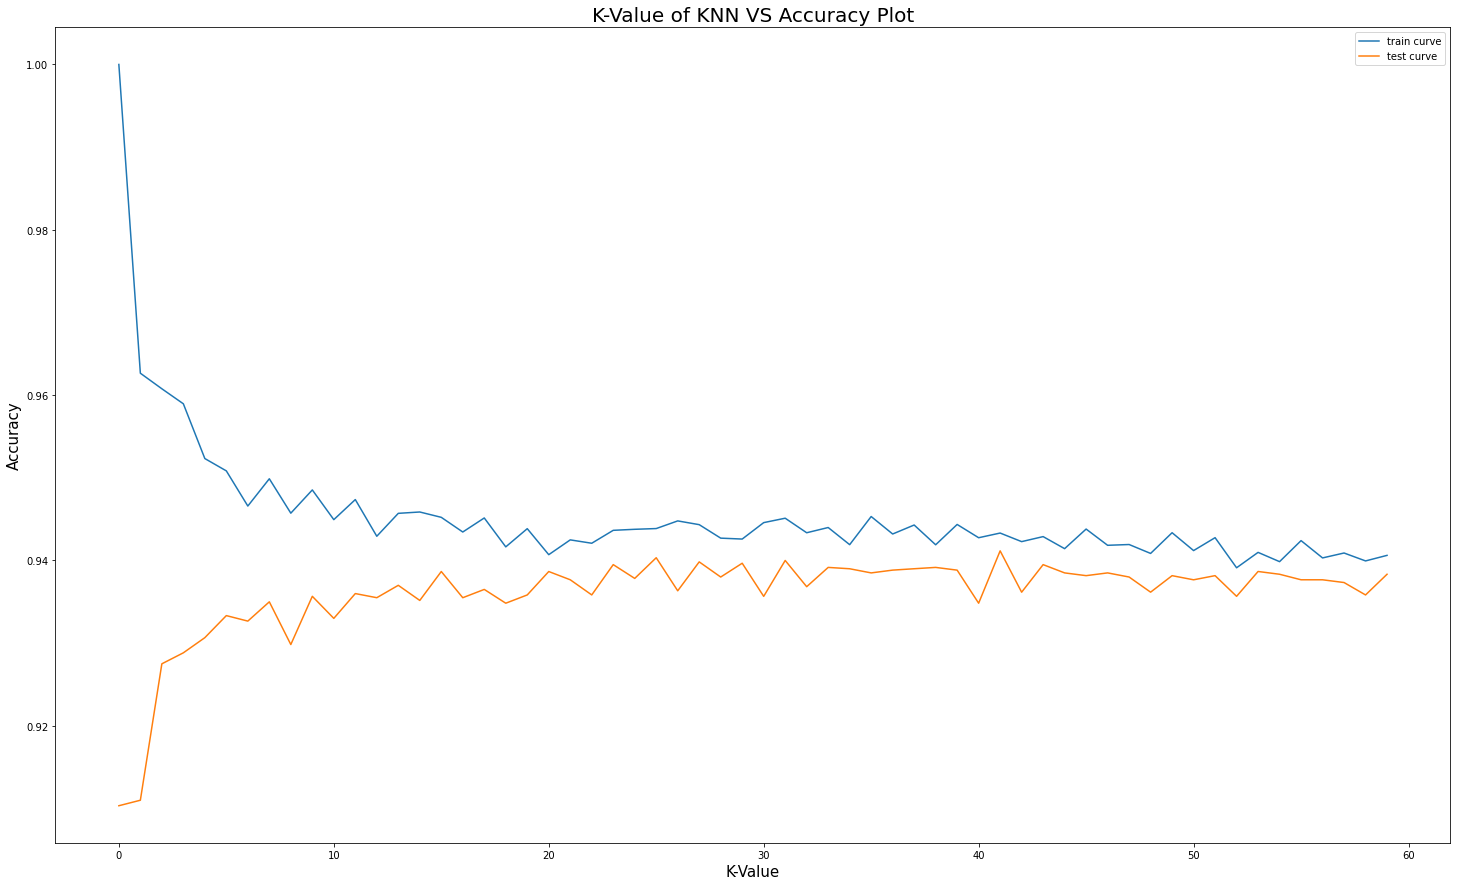

In [120]:
a_list = list(range(0, 60))
plt.figure(figsize=(25,15))
plt.plot(a_list,result5, label='train curve')
plt.plot(a_list,result6, label='test curve')
plt.title('K-Value of KNN VS Accuracy Plot', fontsize = 20)
plt.xlabel("K-Value", fontsize = 15)
plt.ylabel("Accuracy", fontsize = 15)
plt.legend()
plt.show()

In [121]:
for i in range(0,60):
  print('n_neighbors',i+1,'train accuracy' ,result5[i]*100,'test accuracy', result6[i]*100, 'difference',(result5[i] - result6[i])*100)

n_neighbors 1 train accuracy 100.0 test accuracy 91.03352983722245 difference 8.96647016277755
n_neighbors 2 train accuracy 96.26541808192857 test accuracy 91.10009660358963 difference 5.165321478338947
n_neighbors 3 train accuracy 96.07720359575681 test accuracy 92.75023056989126 difference 3.326973025865554
n_neighbors 4 train accuracy 95.89558038083776 test accuracy 92.88319786852722 difference 3.0123825123105408
n_neighbors 5 train accuracy 95.23309281205958 test accuracy 93.06653150156144 difference 2.1665613104981385
n_neighbors 6 train accuracy 95.0838250857054 test accuracy 93.33339786892681 difference 1.7504272167785828
n_neighbors 7 train accuracy 94.65867248343511 test accuracy 93.26681401960842 difference 1.3918584638266895
n_neighbors 8 train accuracy 94.98849999246052 test accuracy 93.50003096909285 difference 1.4884690233676667
n_neighbors 9 train accuracy 94.57245296806768 test accuracy 92.98341445237654 difference 1.5890385156911435
n_neighbors 10 train accuracy 94.853

# **K-Fold Cross Validation for Decision Tree**

In [84]:
titanic_data_df = pd.read_csv("/content/gdrive/My Drive/Synapse_LP/synapse_w2/synapse_w2/titanic_data.csv")
titanic_data_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [85]:
def normalize(data_list):
  X_new = []
  X_max = max(data_list)
  X_min = min(data_list)
  for i in data_list:
    X_new.append( (i - X_min)/(X_max - X_min) )
  return X_new

def titanic_preprocessing_pipeline(df):
  #enter preprocessing steps as done in task 1
  #make sure the preprocessed dataframe looks like the output in task 1
  #return the dataframe
  title_list = []
  for i in df["Name"]:
    title_search = re.search('(\w+)\.', i)
    if title_search:
      title = title_search.group(1)
      title_list.append(title)
  df["Title"] = title_list
  df = df.drop(["PassengerId", "Ticket", "Name"], axis=1, inplace=False)
  df = df.drop(["Cabin"], axis=1, inplace=False)
  df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=False) 
  df["Age"] = df["Age"].fillna(df["Age"].mean(), inplace=False)
  df["Family_members"] = df["SibSp"] + df["Parch"]
  df = df.drop(["SibSp", "Parch"], axis=1, inplace=False)
  df["Age"] = normalize(df["Age"])
  df["Fare"] = normalize(df["Fare"])
  df["Family_members"] = normalize(df["Family_members"])
  df = pd.get_dummies(df, columns=["Pclass", "Sex", "Title", "Embarked"])
  return df

done_df = titanic_preprocessing_pipeline(titanic_data_df2)
done_df

,Survived,Age,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Title_Capt,Title_Col,Title_Countess,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Embarked_C,Embarked_Q,Embarked_S
0,0,0.271174,0.014151,0.1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,0.472229,0.139136,0.1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1,0.321438,0.015469,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1,0.434531,0.103644,0.1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0,0.434531,0.015713,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.334004,0.025374,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
887,1,0.233476,0.058556,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
888,0,0.367921,0.045771,0.3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
889,1,0.321438,0.058556,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [86]:
nss = done_df['Survived'] 
done_df.drop(["Survived"], axis=1, inplace=True)

In [135]:
train_c, test_c, train_v, test_v = train_test_split(done_df, nss, test_size=0.3, random_state=42)

using cross val score

In [136]:
ls = [2,3,4,5,8,10]
for i in ls:
  model = RandomForestClassifier(n_estimators=50, max_depth=20, criterion='gini',max_features='sqrt',min_samples_leaf=5, min_samples_split=30)
  cross_val_scores=cross_val_score(model, done_df,nss , cv=i)
  print(i)
  print(cross_val_scores)
  print("mean:", np.mean(cross_val_scores))


2
[0.78923767 0.8       ]
mean: 0.7946188340807174
3
[0.81481481 0.83838384 0.7979798 ]
mean: 0.8170594837261503
4
[0.8206278  0.83856502 0.81165919 0.82882883]
mean: 0.8249202116915121
5
[0.81564246 0.8258427  0.82022472 0.78651685 0.82022472]
mean: 0.8136902893729208
8
[0.80357143 0.79464286 0.83928571 0.88288288 0.82882883 0.76576577
 0.8018018  0.84684685]
mean: 0.8204532657657657
10
[0.78888889 0.83146067 0.76404494 0.88764045 0.86516854 0.82022472
 0.82022472 0.7752809  0.85393258 0.84269663]
mean: 0.8249563046192259


In [122]:
# using the values of hyperparameters got after performing hyperparameter tuning on decision tree above
train_accu=[]
test_accu=[]
for i in lstm:
  kf = KFold(n_splits=i, shuffle=True) #, shuffle=True
  test_a=[]
  train_a=[]
  model = RandomForestClassifier(n_estimators=50, max_depth=20, criterion='gini',max_features='sqrt',min_samples_leaf=5, min_samples_split=30)
  for train_index, test_index in kf.split(done_df):
      train_c, test_c = done_df.iloc[train_index], done_df.iloc[test_index]
      train_v, test_v = nss.iloc[train_index], nss.iloc[test_index]
      model.fit(train_c, train_v)
      test_a.append(model.score(test_c, test_v))
      train_a.append(model.score(train_c, train_v))
  train_accu.append( ((float) (np.mean(train_a))) )
  test_accu.append( ((float) (np.mean(test_a))) )

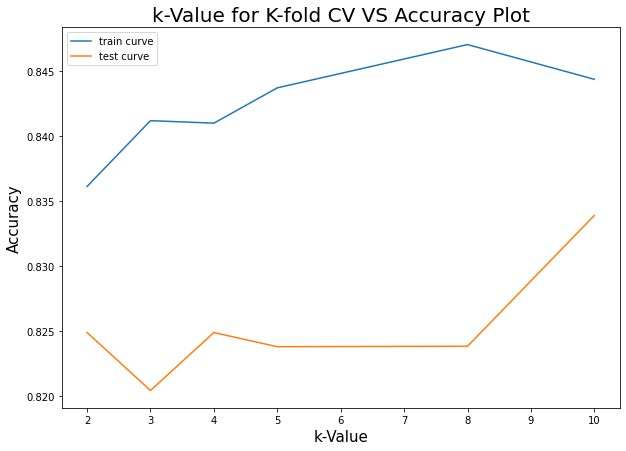

In [123]:
a_list = lstm
plt.figure(figsize=(10,7))
plt.plot(a_list,train_accu, label='train curve')
plt.plot(a_list,test_accu, label='test curve')
plt.title('k-Value for K-fold CV VS Accuracy Plot', fontsize = 20)
plt.xlabel("k-Value", fontsize = 15)
plt.ylabel("Accuracy", fontsize = 15)
plt.legend()
plt.show()

In [124]:
# for i in lstm:
print(2,'- fold split','train accuracy' ,train_accu[0]*100,'test accuracy', test_accu[0]*100, 'difference',(train_accu[0] - test_accu[0])*100)
print(3,'- fold split','train accuracy' ,train_accu[1]*100,'test accuracy', test_accu[1]*100, 'difference',(train_accu[1] - test_accu[1])*100)
print(4,'- fold split','train accuracy' ,train_accu[2]*100,'test accuracy', test_accu[2]*100, 'difference',(train_accu[2] - test_accu[2])*100)
print(5,'- fold split','train accuracy' ,train_accu[3]*100,'test accuracy', test_accu[3]*100, 'difference',(train_accu[3] - test_accu[3])*100)
print(8,'- fold split','train accuracy' ,train_accu[4]*100,'test accuracy', test_accu[4]*100, 'difference',(train_accu[4] - test_accu[4])*100)
print(10,'- fold split','train accuracy' ,train_accu[5]*100,'test accuracy', test_accu[5]*100, 'difference',(train_accu[5] - test_accu[5])*100)

2 - fold split train accuracy 83.61263667052955 test accuracy 82.48904116491158 difference 1.1235955056179692
3 - fold split train accuracy 84.11896745230078 test accuracy 82.04264870931537 difference 2.0763187429854058
4 - fold split train accuracy 84.09968180231465 test accuracy 82.48848624409163 difference 1.611195558223022
5 - fold split train accuracy 84.37146414107191 test accuracy 82.37963718536187 difference 1.991826955710041
8 - fold split train accuracy 84.70442052598663 test accuracy 82.38316441441442 difference 2.321256111572212
10 - fold split train accuracy 84.4370970202459 test accuracy 83.38951310861424 difference 1.0475839116316665


# **F1 score, recall, precision and accuracy from scratch.**

In [165]:
modell = RandomForestClassifier(n_estimators=50, max_depth=20, criterion='gini',max_features='sqrt',min_samples_leaf=5, min_samples_split=30)
modell.fit(train_c,train_v)
pred1 = modell.predict(test_c)
pred2 = modell.predict(train_c)
accu1 = accuracy_score(test_v,pred1)
accu2 = accuracy_score(train_v,pred2)
print(accu1,accu2)

0.8171641791044776 0.841091492776886


In [166]:
cf =confusion_matrix(test_v,pred1)
print(cf)

[[144  13]
 [ 36  75]]


In [167]:
cf =confusion_matrix(test_v,pred1)
accur = (cf[0][0]+cf[1][1])/(cf[0][0]+cf[0][1]+cf[1][0]+cf[1][1])
print('Accuracy:',accur)

preci = (cf[0][0])/(cf[0][0]+cf[0][1])
print('Precision:',preci)

r = (cf[0][0])/float(cf[0][0]+cf[1][0])
print('Recall',r)

F1 = (r*preci*2)/(r+preci)
print('F1 Score',F1)

Accuracy: 0.8171641791044776
Precision: 0.9171974522292994
Recall 0.8
F1 Score 0.85459940652819
